## Feature Scaling on the Iris Dataset

Step 1: Import libraries and load dataset

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

print(X.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Step 2: Apply different scaling methods
(a) Standardization (Z-score)

In [2]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

print("\nStandardized Data (mean ≈ 0, std ≈ 1):")
print(X_std.head())



Standardized Data (mean ≈ 0, std ≈ 1):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


(b) Min-Max Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()
X_mm = scaler_mm.fit_transform(X)
X_mm = pd.DataFrame(X_mm, columns=X.columns)

print("\nMin-Max Scaled Data (range [0,1]):")
print(X_mm.head())



Min-Max Scaled Data (range [0,1]):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667


(c) Robust Scaling

In [4]:
from sklearn.preprocessing import RobustScaler

scaler_rb = RobustScaler()
X_rb = scaler_rb.fit_transform(X)
X_rb = pd.DataFrame(X_rb, columns=X.columns)

print("\nRobust Scaled Data (uses median & IQR):")
print(X_rb.head())



Robust Scaled Data (uses median & IQR):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.538462               1.0          -0.842857         -0.733333
1          -0.692308               0.0          -0.842857         -0.733333
2          -0.846154               0.4          -0.871429         -0.733333
3          -0.923077               0.2          -0.814286         -0.733333
4          -0.615385               1.2          -0.842857         -0.733333


Step 3: Compare the results visually

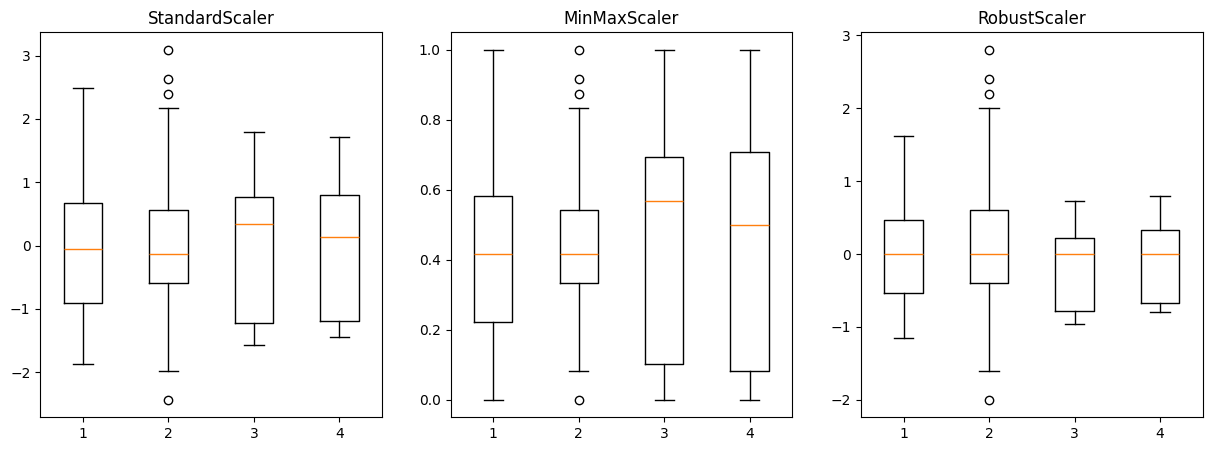

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].boxplot(X_std)
ax[0].set_title("StandardScaler")

ax[1].boxplot(X_mm)
ax[1].set_title("MinMaxScaler")

ax[2].boxplot(X_rb)
ax[2].set_title("RobustScaler")

plt.show()


Step 4: Use in a model
After scaling, you can directly feed the scaled data to models like Logistic Regression, KNN, or SVM.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Use Standard Scaled data
X_train, X_test, y_train, y_test = train_test_split(X_std, iris.target, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred)*100)


Accuracy: 100.0
